<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Jarque-Bera%20Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

16:39:14 Starting...
16:39:14 Installing yfinance into Google notebook...
16:39:18 Installing arch into Google notebook...
16:39:26 Initialized.


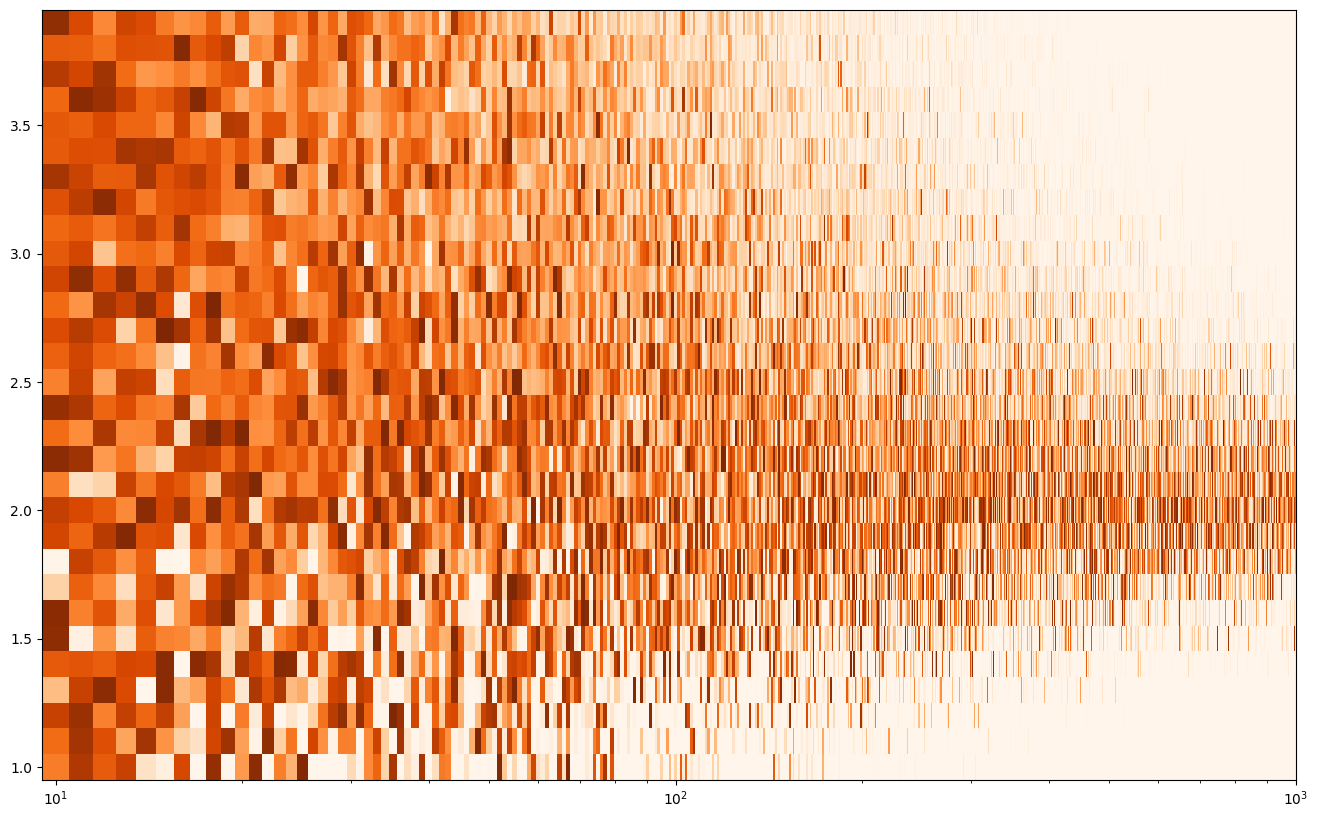

In [14]:
from scipy.stats import norm,gennorm,jarque_bera as jbtest
from itertools import product

results=pd.DataFrame()
results.index=pd.MultiIndex.from_tuples(list(product(list(range(10,1001,1)),list(np.arange(one,four,0.1)))))
results.index.names=["Sample","Beta"]

for n,beta in results.index:
    sample=pd.Series(gennorm(beta,zero,one).rvs(n))
    results.loc[(n,beta),"Mean"]=sample.mean()
    results.loc[(n,beta),"St.Dev."]=sample.var()
    results.loc[(n,beta),"Skewness"]=sample.skew()
    results.loc[(n,beta),"Kurtosis"]=sample.kurt()+three
    results.loc[(n,beta),"JB Test"]=jbtest(sample)[1]

results["JB 5%"]=results["JB Test"]<0.05
results["JB 1%"]=results["JB Test"]<0.01
results["JB 0.1%"]=results["JB Test"]<0.001

Z=(df:=results.reset_index()).pivot_table(index="Beta",columns="Sample",values="JB Test").values
X,Y=np.meshgrid(np.sort(df["Sample"].unique()),np.sort(df["Beta"].unique()))
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.pcolormesh(X,Y,Z,cmap='Oranges')
plot.set_xscale('log')

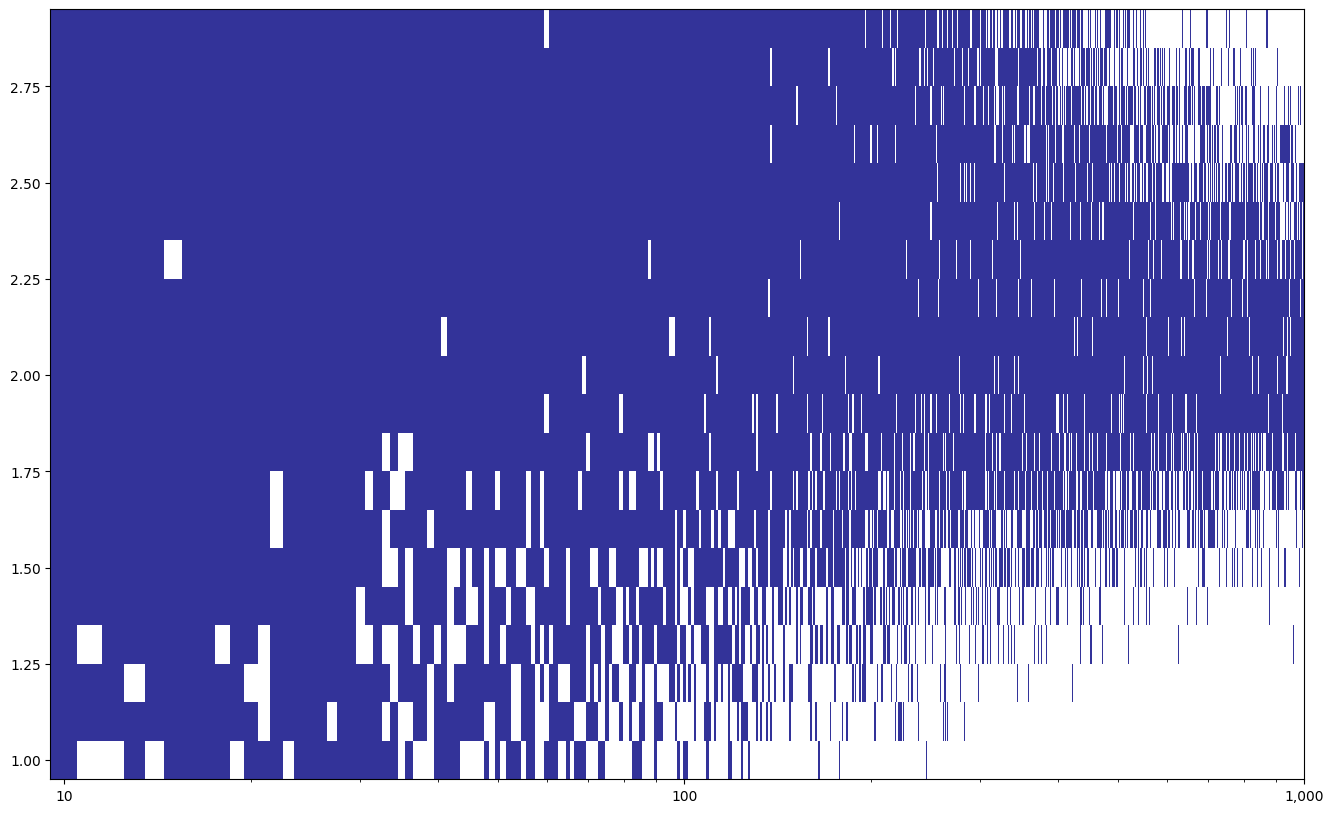

In [13]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.pcolormesh(X,Y,Z,cmap='terrain')
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))